Galstreams - Plotting and Utilities Guide 
======================================

In this notebook you'll find examples and plots of most galstreams functionalities

In [1]:
import scipy
import pandas as pd
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import galstreams

Instantiating the library
------------------------

First, create a MWStreams object. This will contain all the individual tracks for the streams registered in the library. By default only one track is implemented per stream (some streams have multiple tracks available), this is indicated by the implement_Off keyword being set to False (default). You can change this behaviour by setting it to True.

Also, if you're a TOPCAT fan (and why wouldn't you be?) the first time you run galstreams you can use the print_topcat_friendly_files keyword set to True to create TOPCAT-friendly files in the library's *galstreams/tracks* directory for convenient use plotting the full library at once in TOPCAT.

In [3]:
#Set print_topcat_friendly_files=True the first time to create TOPCAT friendly files
mws = galstreams.MWStreams(verbose=False, implement_Off=False, print_topcat_friendly_files=False)

Initializing galstreams library from master_log... 


The MWStreams object has a summary attribute, which is a Pandas DataFrame with summary information for the library as a whole. It includes information for *all* the available tracks. You can have a look at it with:

In [17]:
mws.summary[:3] #show only the first few lines

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,distance_mid,ra_pole,dec_pole,InfoFlags,has_empirical_track,has_D,has_pm,has_vrad,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,26.839948,235.758575,38.821881,0000,0,0,0,0,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,15.929409,308.056470,72.509388,1101,1,1,0,1,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,31.157872,-32.879053,...,21.981943,74.259068,47.933124,1111,1,1,1,1,Shipp2018,3


A stream's track is retrieved using the unique TrackName. You can query the MWStreams object to find out the name of the available track(s) for a given stream by providing it's name (or part of it) to the get_track_names_for_stream method. This will retrieve *all* the available TrackNames:

In [5]:
mws.get_track_names_for_stream('Pal')

['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

Setting the *On_only*. keyword as True will return only the active track(s) for the all the matching stream name(s)

In [6]:
mws.get_track_names_for_stream('Pal', On_only=True)

['Cetus-Palca-T21', 'Pal13-S20', 'Pal15-M17', 'Pal5-PW19', 'Palca-S18']

finally, the track is stored as a SkyCoord object in the track attribute:

In [7]:
mws['Pal5-PW19'].track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(242.09382437,  6.88309503, 22.02340828),
     (242.08670244,  6.87558676, 22.02333424),
     (242.07954494,  6.86813405, 22.02325892), ...,
     (224.67592037, -4.79218842, 19.09368606),
     (224.66687368, -4.79668187, 19.09096063),
     (224.65738999, -4.80051508, 19.08823394)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.12850417, -2.34952027, 999.00002274),
     (-2.12922183, -2.34945636, 999.00002274),
     (-2.12993892, -2.34939303, 999.00002274), ...,
     (-2.77331871, -3.06772628, 999.00002188),
     (-2.77323034, -3.0684521 , 999.00002188),
     (-2.77314357, -3.06917651, 999.00002188)]>

Checking available information
------------------------------
The columns *has_empirical_track*, *has_D*, *has_pm* and *has_vrad* contain flags indicating the information available in the library for a given track. Note: this information is also summarised as a single composite flag in InfoFlags, in the same order.

You can print out, e.g., the stream and track names for the tracks that have proper motion information:

In [8]:
has_pm = mws.summary.has_pm > 0
mws.summary.loc[has_pm,["Name","TrackName"]]

,Name,TrackName
TrackName,,
AAU-AliqaUma-L21,AAU-AliqaUma,AAU-AliqaUma-L21
AAU-ATLAS-L21,AAU-ATLAS,AAU-ATLAS-L21
ATLAS-I21,AAU-ATLAS,ATLAS-I21
ACS-R21,ACS,ACS-R21
Aquarius-W11,Aquarius,Aquarius-W11
...,...,...
Turbio-S18,Turbio,Turbio-S18
Turranburra-S19,Turranburra,Turranburra-S19
Wambelong-S18,Wambelong,Wambelong-S18


Note that 0 means information is unavailable, anything >0 means it is available but >1 means there's a caveat or something to be careful about. In those cases, see the section correspoding to each stream in Mateu (2023)

Plotting a Stream Track
----------------------

You can make a quick plot of the stream's celestial, distance and proper motions tracks with the plot_5D_tracks_subplots_row function. In the following example we plot the Orphan stream's active track (K19=Koposov et al. 2019) in the galactic coordinate frame by passing it the track object (it can take any SkyCoord object) and the Galactic frame object from astropy.

In [9]:
mws.get_track_names_for_stream('Orphan', On_only=True)

['Orphan-K19']

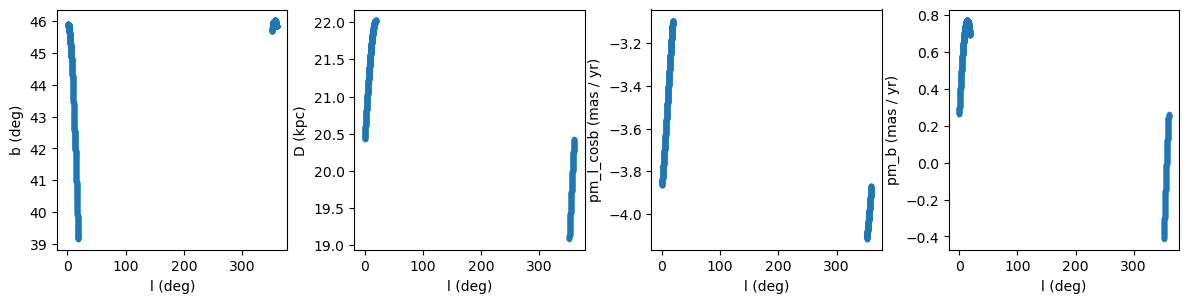

In [12]:
st = 'Orphan-K19'
st = 'Pal5-PW19'
galstreams.plot_5D_tracks_subplots_row(mws[st].track, frame = ac.Galactic(), show_ylabels=True, )
#If you want to make the same plot in equatorial coordinates, use frame = ac.ICRS()

You can also plot it in the stream's coordinate frame stored in the *stream_frame* attribute.

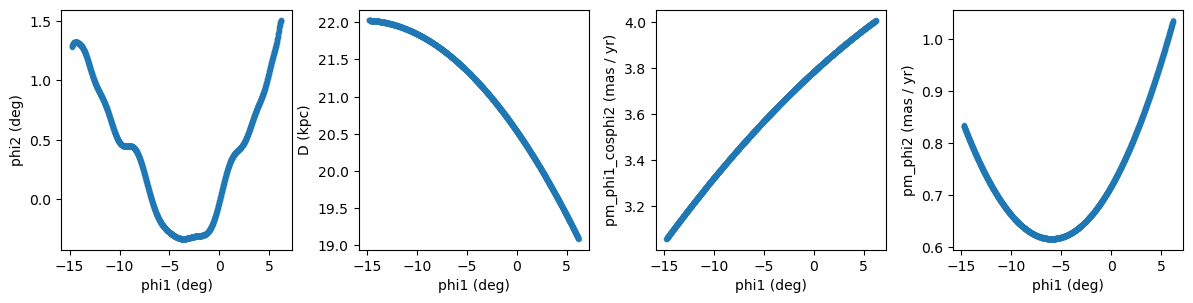

In [13]:
galstreams.plot_5D_tracks_subplots_row(mws[st].track, frame = mws[st].stream_frame, show_ylabels=True)

The next example shows how to plot the tracks for a list of streams, in the first stream's own reference frame. 

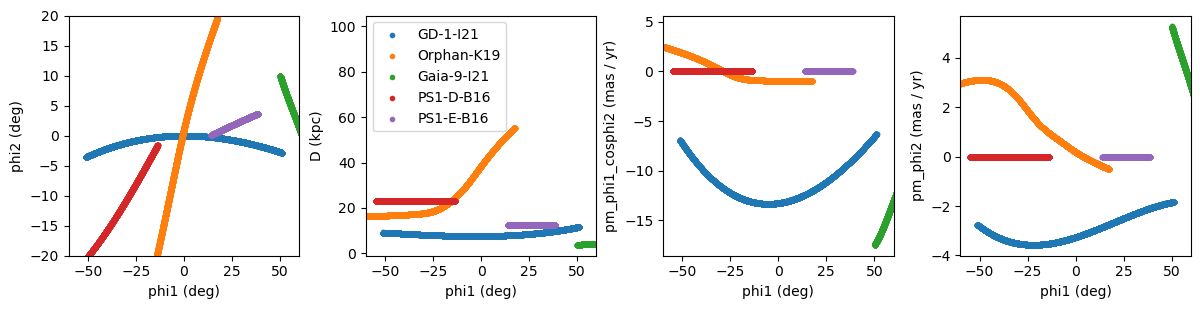

In [14]:
fr = mws['GD-1-I21'].stream_frame

fig, axs = plt.subplots(1,4, figsize=(12,3))
plt.tight_layout(pad=1.1, w_pad=1.4)
for st in ['GD-1-I21','Orphan-K19','Gaia-9-I21','PS1-D-B16','PS1-E-B16']:
    scat_kwds = dict(marker='.',label=st)
    galstreams.plot_5D_tracks_subplots_row(mws[st].track, frame = fr, axs=axs, show_ylabels=True, scat_kwds=scat_kwds)

for ax in axs:    
    ax.set_xlim(-60,60)    
axs[0].set_ylim(-20,20)  
axs[1].legend()

Plotting the stream tracks in a given sky window
-------------------------------------------------

In a more general case of the above plot, you may want to show only the stream tracks that go accross
a particular portion of the sky. To do that, use the get_track_names_in_sky_window, it returns the
 tracks names of the streams in a given window, which can be specified by the sky coord ranges in any given coordinate frame. For example, see the l-b plot for a window around the Pal-5 stream

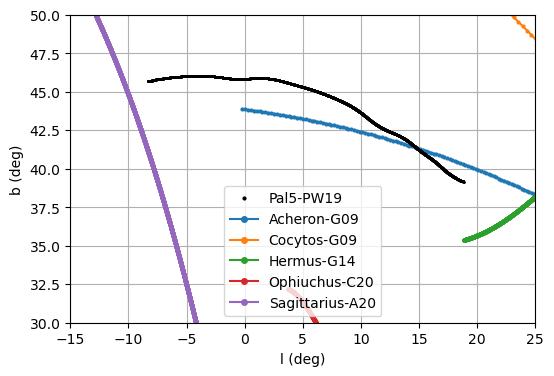

In [15]:
plt.figure(1,figsize=(6,4))
ax = plt.subplot(111)
#Plot the track
st = 'Pal5-PW19'
wa = 180*u.deg 
ax.plot(mws[st].track.galactic.l.wrap_at(wa), mws[st].track.galactic.b, '.', ms=2., color='k', label=st, zorder=99)

tnames = mws.get_track_names_in_sky_window([-15,25]*u.deg, [30,50]*u.deg, frame=ac.Galactic,
                                           On_only=True, wrap_angle=180.*u.deg)

for st in tnames:
    if st in 'Pal5-PW19': continue
    ax.plot(mws[st].track.galactic.l.wrap_at(wa).deg, mws[st].track.galactic.b.deg, '-o', ms=2., label=st)

ax.legend(markerscale=2)    
ax.set_xlim(-15,25)
ax.set_ylim(30,50)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')

ax.grid()

Or in the GD-1 plot from before, there actually many more streams in that particular region of the sky, the plot below shows how busy the area really is.

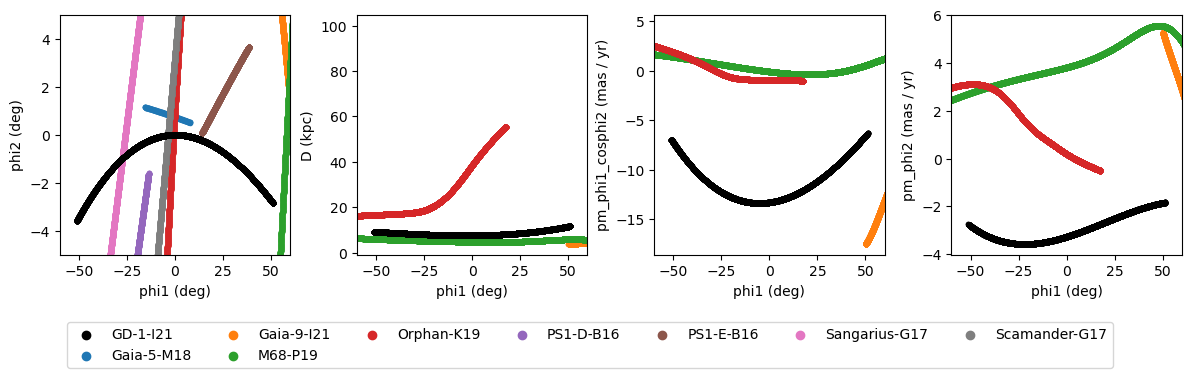

In [16]:
st_ref = 'GD-1-I21'
fr = mws[st_ref].stream_frame

fig, axs = plt.subplots(1,4, figsize=(12,3))
plt.tight_layout(pad=1.1, w_pad=1.4)

scat_kwds = dict(marker='.',label=st_ref, color='k', zorder=99)   
galstreams.plot_5D_tracks_subplots_row(mws[st_ref].track, frame = fr, axs=axs, 
                                       show_ylabels=True, scat_kwds=scat_kwds)

phi1_range, phi2_range = [-60,60], [-5, 5.]
tnames = mws.get_track_names_in_sky_window(phi1_range*u.deg, phi2_range*u.deg, 
                                           frame=mws[st_ref].stream_frame,
                                           On_only=True, wrap_angle=0.*u.deg)
j=0
for st in tnames:
    if st in st_ref: continue
    #Passing the InfoFlags keyword will allow plotting only tracks that have each of the attributes
    #available to be plotted (i.e. not showing '0' for streams w/o distance or pms)
    scat_kwds = dict(marker='.',label=st, color=f'C{j}')
    j+=1
    galstreams.plot_5D_tracks_subplots_row(mws[st].track, frame = fr, axs=axs, 
                                           InfoFlags = mws[st].InfoFlags,
                                           show_ylabels=True, scat_kwds=scat_kwds)

   
for ax in axs:    
    ax.set_xlim(phi1_range)   
    
axs[0].set_ylim(phi2_range)  
axs[0].legend(loc='upper left', bbox_to_anchor=(0.,-0.25), ncol=7, markerscale=2.)


Plotting stream tracks with radial velocity info
------------------------------------------------

Radial (line of sight) velocity tracks are also supported, but only a few streams have this information. The last bit of InfoFlags is set to 1 when the information is available. You can list which streams have radial velocities as follows:

In [17]:
for st in mws.all_track_names():
 if mws.summary.loc[st]["InfoFlags"][3]=='1': print(st)    

300S-F18
AAU-AliqaUma-L21
AAU-ATLAS-L21
Aquarius-W11
LMS1-M21
LMS1-Y20
Orphan-K19
Tri-Pis-B12


In [18]:
#or as follows using the has_vrad col
mws.summary["TrackName"][mws.summary.has_vrad==1]

TrackName
300S-F18                    300S-F18
AAU-AliqaUma-L21    AAU-AliqaUma-L21
AAU-ATLAS-L21          AAU-ATLAS-L21
Aquarius-W11            Aquarius-W11
LMS1-M21                    LMS1-M21
LMS1-Y20                    LMS1-Y20
Orphan-K19                Orphan-K19
Tri-Pis-B12              Tri-Pis-B12
Name: TrackName, dtype: object

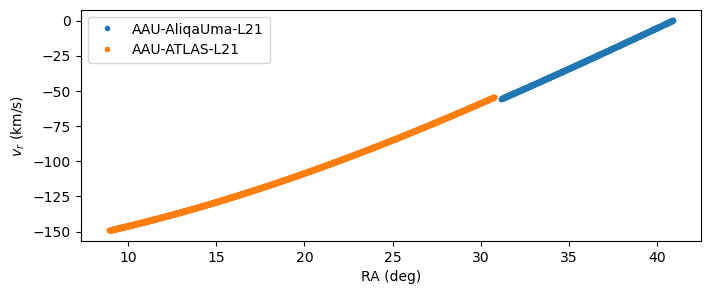

In [19]:
fig = plt.figure(1,figsize=(8,3))
ax = fig.add_subplot(111)
for st in ['AAU-AliqaUma-L21','AAU-ATLAS-L21']:
    ax.plot(mws[st].track.ra,mws[st].track.radial_velocity,'.', label=st)
ax.legend()
ax.set_xlabel('RA (deg)')
ax.set_ylabel('$v_r$ (km/s)');

Plotting the full library
--------------------

To plot the entire library you just need to loop over all the active tracks. In this example we annotate each one at the first of the two end points stored in the *end_points* attribute of each track. You could also use the mid_point as attribute as a reference for labelling. Here is a simple Mollweide projection plot in galactic coordinates:

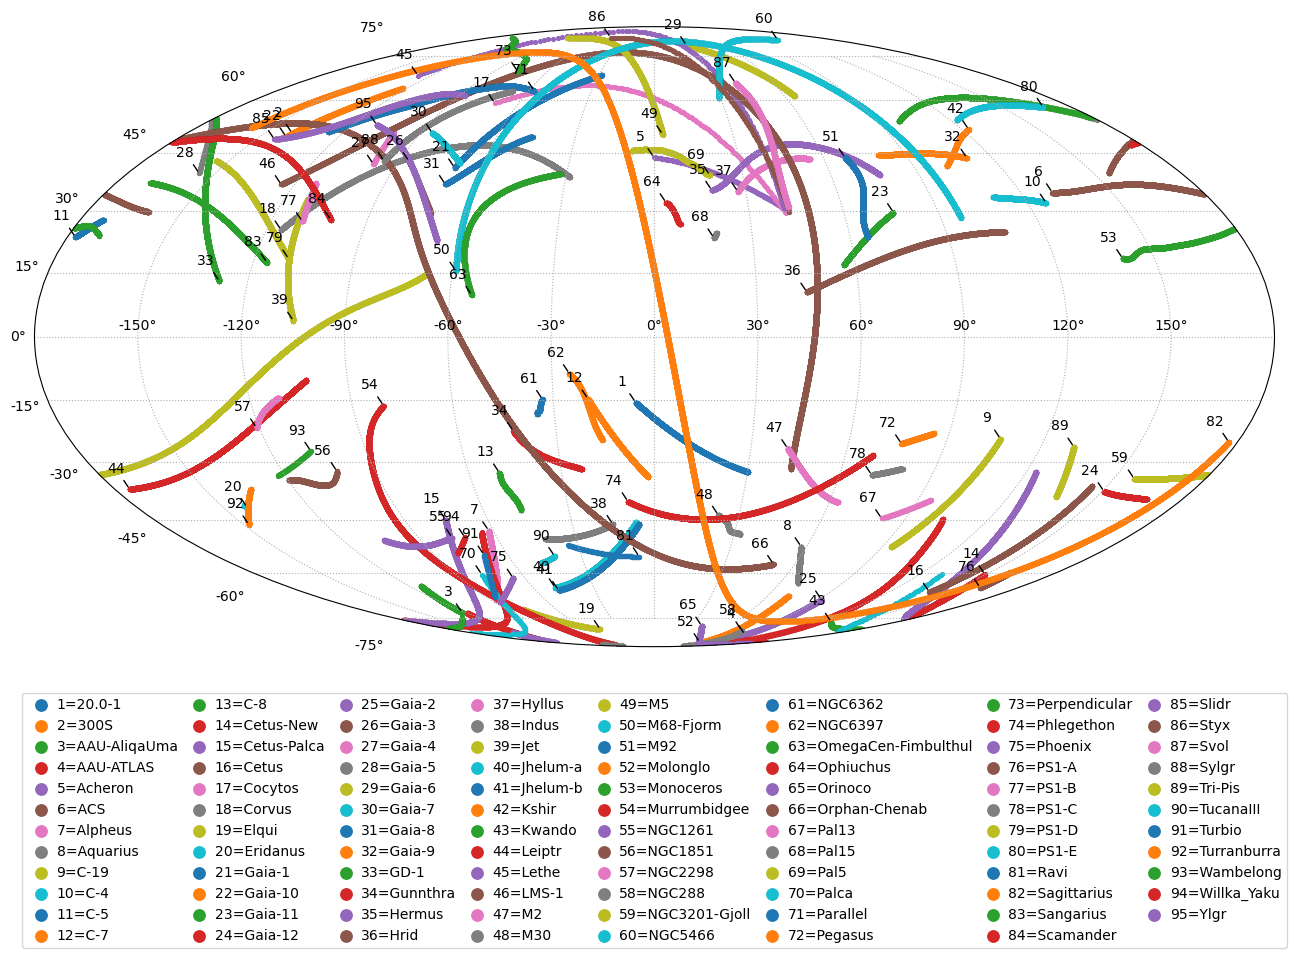

In [20]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')

for st in mws.keys():
  #Plot the tracks  
  ax.scatter(mws[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mws[st].track.galactic.b.rad, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mws[st].ID,Name=mws[st].stream_name))
  #Annotate at one of the end points  
  xo = mws[st].end_points.galactic.l.wrap_at(180*u.deg)[0].rad
  yo = mws[st].end_points.galactic.b[0].rad  
  ax.annotate(mws[st].ID, xy=(xo,yo),
              xycoords='data',
              arrowprops=dict(arrowstyle="-",color='k'),
              horizontalalignment='center', verticalalignment='center', 
              xytext=(-10,15),textcoords='offset points',
              )

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

Note: For more flexibility involving projection plots you can use the Basemap package (this can be a bit trickier to install, so for convenience, most examples in this notebook are provided using matplotlib's projection option). For some examples using Basemap see the end of this notebook.

Because the track is a SkyCoord object, you can easily transform into another reference system. Below there is a 3D plot in cartesian galactocentric coordinates:

In [21]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

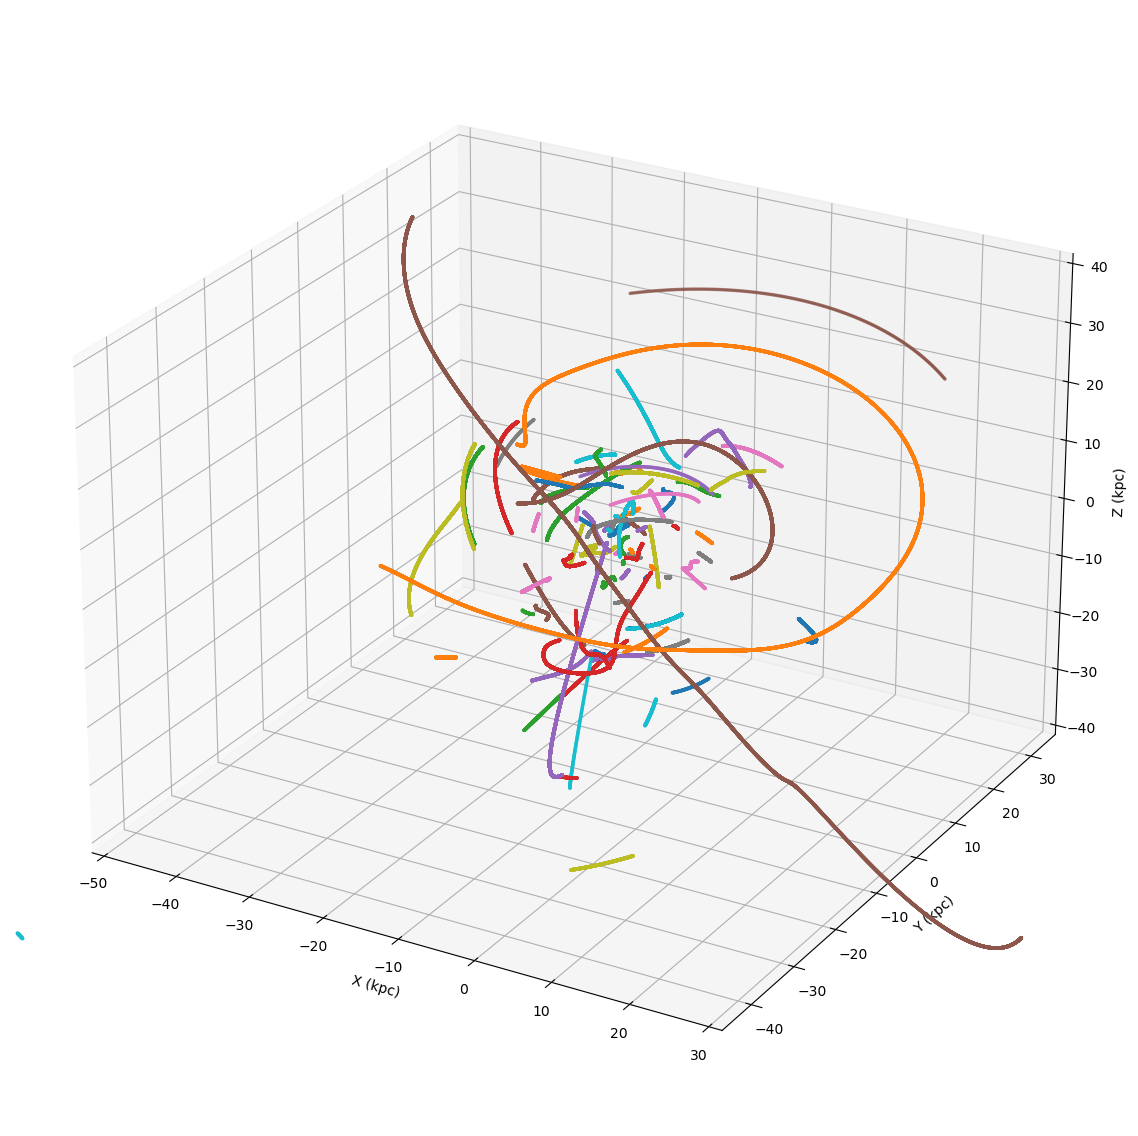

In [35]:
fig = plt.figure(1,figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

gsr = ac.Galactocentric()

j=0
for st in mws.keys():
 
  ax.scatter3D(mws[st].track.transform_to(gsr).x,mws[st].track.transform_to(gsr).y, mws[st].track.transform_to(gsr).z,
               marker='.', s=10, c=None, alpha=0.7,
               label="{ID:.0f}={Name}".format(ID=mws.summary.ID[st],Name=mws.summary.Name[st]))

D = 40.
xo, yo, zo = -10, -5., 0.
ax.set_xlim(xo-D,xo+D)
ax.set_ylim(yo-D,yo+D)
ax.set_zlim(zo-D,zo+D)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

# Point of view
ax.view_init(elev=25., azim=-60.)

fig.subplots_adjust(left=0.02,right=0.98, top=0.98, bottom=0.05)

Polygon Footprints
------------------

If you have a catalogue and would like to select objects within a given width of the track in the sky, you can do this with the polygon footprint utilities. You can also use them to shift the track by a given offset and select stars in a similar area off-stream, to use as a control field, for example.

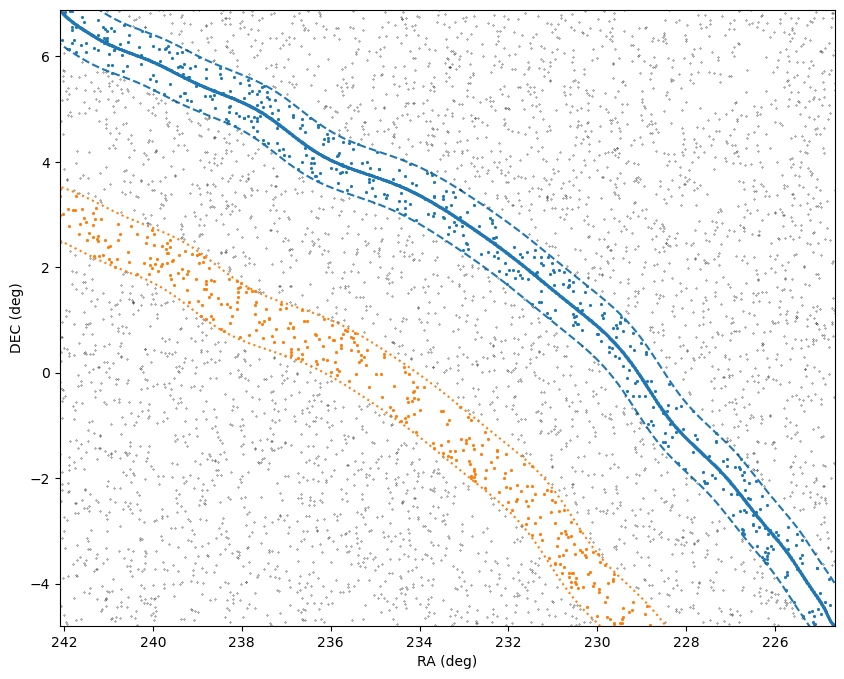

In [36]:
st = "Pal5-PW19"

#Generate random points on the sphere in an area around the track
rao,raf = np.min(mws[st].track.ra.deg), np.max(mws[st].track.ra.deg)
deco,decf = np.min(mws[st].track.dec.deg),np.max(mws[st].track.dec.deg)
field_ra, field_dec = galstreams.get_random_spherical_angles(5000,az=[rao,raf],
                                                           lat=[deco,decf],degree=True)
field = ac.SkyCoord(ra=field_ra*u.deg, dec=field_dec*u.deg, frame='icrs')

plt.figure(1,figsize=(10,8))
ax = plt.subplot(111)
#Plot the track
ax.plot(mws[st].track.ra, mws[st].track.dec, '.', ms=2., color='C0')
#plot the default polygon track stored in the library 
ax.plot(mws[st].poly_sc.icrs.ra, mws[st].poly_sc.icrs.dec, ls='--', color='C0')
#Random background "field" points 
ax.plot(field.ra, field.dec, 'k.', ms=0.5)

#Select the field points inside the polygon footprint
on = mws[st].get_mask_in_poly_footprint(field)
ax.plot(field.ra[on], field.dec[on], '.', ms=2.5, color='C0')

#Create a new polygon footprint off-stream, with a given offset and width, and select field points inside it 
off_poly = mws[st].create_sky_polygon_footprint_from_track(width=1.*u.deg, phi2_offset=3.5*u.deg)
off = galstreams.get_mask_in_poly_footprint(off_poly, field, stream_frame=mws[st].stream_frame)
#Plot the off-stream polygon footprint and points selected inside it
ax.plot(off_poly.icrs.ra, off_poly.icrs.dec, ls=':', color='C1')
ax.plot(field.ra[off], field.dec[off], '.', ms=2.5, color='C1')

ax.set_xlim(rao,raf)
ax.set_ylim(deco,decf)   
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
ax.invert_xaxis()

Pole and Angular Momentum Tracks
-----------------------------

The library also contains pole tracks for all streams and heliocentric angular momentum tracks for all the streams with proper motion data. Here's an example showing the two tracks, in the heliocentric frame, for four selected stellar streams. The light colored track corresponds to the angular momentum track, the pole track for the same stream has the same color in a dark shade. For more details see [Mateu (2022)](https://arxiv.org/abs/2204.10326).

In [11]:
import seaborn as sns #just for plot aesthetics

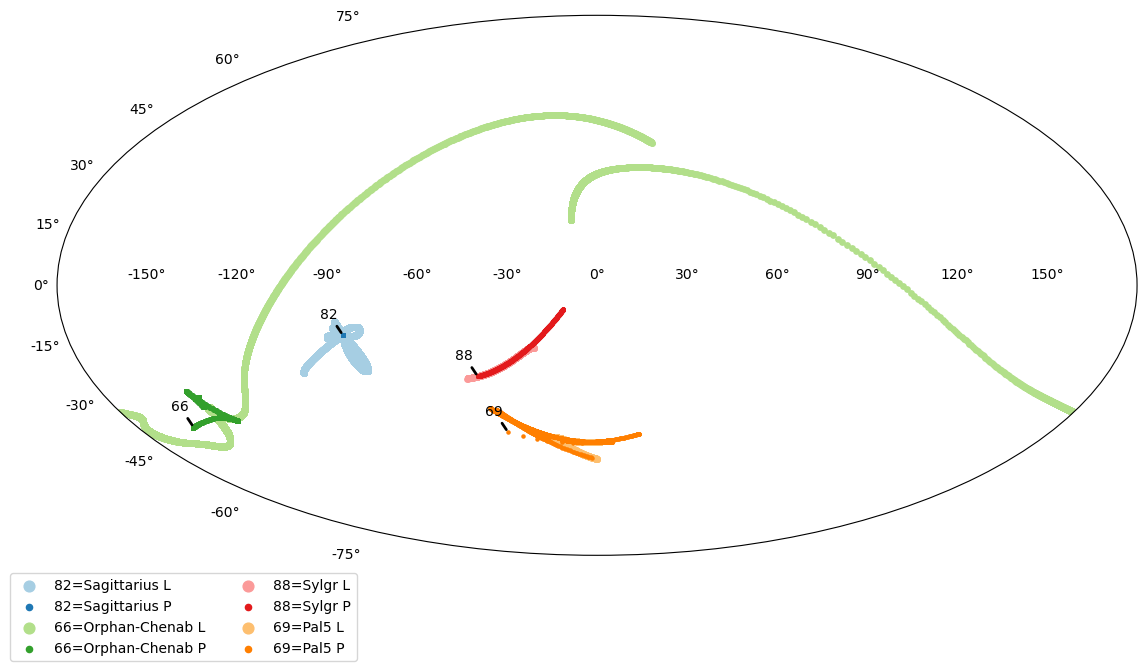

In [38]:
sns.set_palette('Paired') #just for plot aesthetics
fig=plt.figure(1,figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')

for st in ['Sagittarius-A20','Orphan-K19','Sylgr-I21','Pal5-PW19']:   
   
  ID = mws.summary.ID[st]
  name="{ID:.0f}={Name}".format(ID=ID,Name=mws.summary.Name[st])
 
  if (mws.summary.loc[st,"InfoFlags"][2]!='0'):  

    L_mod, L_b, L_l = mws[st].angular_momentum_helio
    
    #L track
    x,y = L_l.wrap_at(180*u.deg).rad, L_b.rad
    ax.scatter(x,y, s=15, label=name+' L')

    #Pole track    
    x,y = mws[st].pole_track_helio.galactic.l.wrap_at(180*u.deg).rad, mws[st].pole_track_helio.galactic.b.rad
    ax.scatter(x,y, s=5, label=name+' P')
    mid_pole_helio = mws[st].mid_pole


    label = "{id:.0F}".format(id=ID)
    xy_stream = (mws[st].pole_track_helio.l.rad, mws[st].pole_track_helio.b.rad)  
    xy_stream = (x[-1],y[-1])
    ax.annotate(label, xy=xy_stream,  xycoords='data',  #weight="bold",
            xytext=(-10,15), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-", lw=2, color='k'),
            horizontalalignment='center', verticalalignment='center')


    
ax.legend(ncol=2,loc='upper left', markerscale=2., bbox_to_anchor=(-0.05,-0.02))

fig.subplots_adjust(left=0.05,right=0.95, bottom=0.05, top=1.4)

Listing Track and Stream Names
--------------------

A couple utility functions are provided to list all the tracks' names available (all_track_names), all active tracks' names (all_track_names(On_only=True)) and  all the unique stream names available (all_unique_stream_names)

In [39]:
mws.all_track_names()

array(['20.0-1-M18', '300S-F18', 'AAU-AliqaUma-L21', 'AAU-ATLAS-L21',
       'ATLAS-I21', 'Acheron-G09', 'ACS-R21', 'Alpheus-G13',
       'Aquarius-W11', 'C-19-I21', 'C-4-I21', 'C-5-I21', 'C-7-I21',
       'C-8-I21', 'Cetus-New-Y21', 'Cetus-Palca-T21', 'Cetus-Palca-Y21',
       'Cetus-Y13', 'Cocytos-G09', 'Corvus-M18', 'Elqui-S19',
       'Eridanus-M17', 'Fimbulthul-I21', 'Gaia-1-I21', 'Gaia-10-I21',
       'Gaia-11-I21', 'Gaia-12-I21', 'Gaia-2-I21', 'Gaia-3-M18',
       'Gaia-4-M18', 'Gaia-5-M18', 'Gaia-6-I21', 'Gaia-7-I21',
       'Gaia-8-I21', 'Gaia-9-I21', 'GD-1-I21', 'GD-1-PB18',
       'Gunnthra-I21', 'Hermus-G14', 'Hrid-I21', 'Hyllus-G14',
       'Indus-S19', 'Jet-F22', 'Jet-J18', 'Jhelum-a-B19', 'Jhelum-a-S19',
       'Jhelum-b-B19', 'Jhelum-b-S19', 'Jhelum-I21', 'Kshir-I21',
       'Kwando-G17', 'Kwando-I21', 'Leiptr-I21', 'Lethe-G09', 'LMS1-M21',
       'LMS1-Y20', 'M2-G22', 'M2-I21', 'M30-S20', 'M5-G19', 'M5-I21',
       'M5-S20', 'M68-I21', 'Fjorm-I21', 'M68-P19', 'M92-I21'

In [40]:
#Print active track names only
mws.all_track_names(On_only=True)

dict_keys(['20.0-1-M18', '300S-F18', 'AAU-AliqaUma-L21', 'AAU-ATLAS-L21', 'Acheron-G09', 'ACS-R21', 'Alpheus-G13', 'Aquarius-W11', 'C-19-I21', 'C-4-I21', 'C-5-I21', 'C-7-I21', 'C-8-I21', 'Cetus-New-Y21', 'Cetus-Palca-T21', 'Cetus-Y13', 'Cocytos-G09', 'Corvus-M18', 'Elqui-S19', 'Eridanus-M17', 'Gaia-1-I21', 'Gaia-10-I21', 'Gaia-11-I21', 'Gaia-12-I21', 'Gaia-2-I21', 'Gaia-3-M18', 'Gaia-4-M18', 'Gaia-5-M18', 'Gaia-6-I21', 'Gaia-7-I21', 'Gaia-8-I21', 'Gaia-9-I21', 'GD-1-I21', 'Gunnthra-I21', 'Hermus-G14', 'Hrid-I21', 'Hyllus-G14', 'Indus-S19', 'Jet-F22', 'Jhelum-a-B19', 'Jhelum-b-B19', 'Kshir-I21', 'Kwando-I21', 'Leiptr-I21', 'Lethe-G09', 'LMS1-Y20', 'M2-I21', 'M30-S20', 'M5-G19', 'M68-P19', 'M92-I21', 'Molonglo-G17', 'Monoceros-R21', 'Murrumbidgee-G17', 'NGC1261-I21', 'NGC1851-I21', 'NGC2298-I21', 'NGC288-I21', 'NGC3201-P21', 'NGC5466-J21', 'NGC6362-S20', 'NGC6397-I21', 'OmegaCen-I21', 'Ophiuchus-C20', 'Orinoco-G17', 'Orphan-K19', 'Pal13-S20', 'Pal15-M17', 'Pal5-PW19', 'Palca-S18', 'Paral

In [41]:
mws.all_unique_stream_names()

array(['20.0-1', '300S', 'AAU-ATLAS', 'AAU-AliqaUma', 'ACS', 'Acheron',
       'Alpheus', 'Aquarius', 'C-19', 'C-4', 'C-5', 'C-7', 'C-8', 'Cetus',
       'Cetus-New', 'Cetus-Palca', 'Cocytos', 'Corvus', 'Elqui',
       'Eridanus', 'GD-1', 'Gaia-1', 'Gaia-10', 'Gaia-11', 'Gaia-12',
       'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'Gaia-6', 'Gaia-7',
       'Gaia-8', 'Gaia-9', 'Gunnthra', 'Hermus', 'Hrid', 'Hyllus',
       'Indus', 'Jet', 'Jhelum-a', 'Jhelum-b', 'Kshir', 'Kwando', 'LMS-1',
       'Leiptr', 'Lethe', 'M2', 'M30', 'M5', 'M68-Fjorm', 'M92',
       'Molonglo', 'Monoceros', 'Murrumbidgee', 'NGC1261', 'NGC1851',
       'NGC2298', 'NGC288', 'NGC3201-Gjoll', 'NGC5466', 'NGC6362',
       'NGC6397', 'OmegaCen-Fimbulthul', 'Ophiuchus', 'Orinoco',
       'Orphan-Chenab', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E',
       'Pal13', 'Pal15', 'Pal5', 'Palca', 'Parallel', 'Pegasus',
       'Perpendicular', 'Phlegethon', 'Phoenix', 'Ravi', 'Sagittarius',
       'Sangarius', 'Scamander', 'Sl

For a list of the MWStreams attributes and methods available, use the help:

In [42]:
help(mws)

Help on MWStreams in module galstreams object:

class MWStreams(builtins.dict)
 |  MWStreams(verbose=False, implement_Off=False)
 |  
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Method resolution order:
 |      MWStreams
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, verbose=False, implement_Off=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  all_track_names(self, On_only=False)
 |      Returns TrackNames available in the library (when On_only=False, equivalent to MWStreams.summary['TrackName']) 
 |      
 |      Parameters:
 |  

Plotting examples using BaseMap
===============================

In these examples the more powerful Basemap library is used to handle map projections. This library has many more predefined projections available and has more flexibility for plot customization than the projection keyword in matplotlib. 

In [10]:
from mpl_toolkits.basemap import Basemap
#Note: Make sure to update the proj4 library before installing Basemap with conda to avoid errors

Mollweide - Galactic
--------

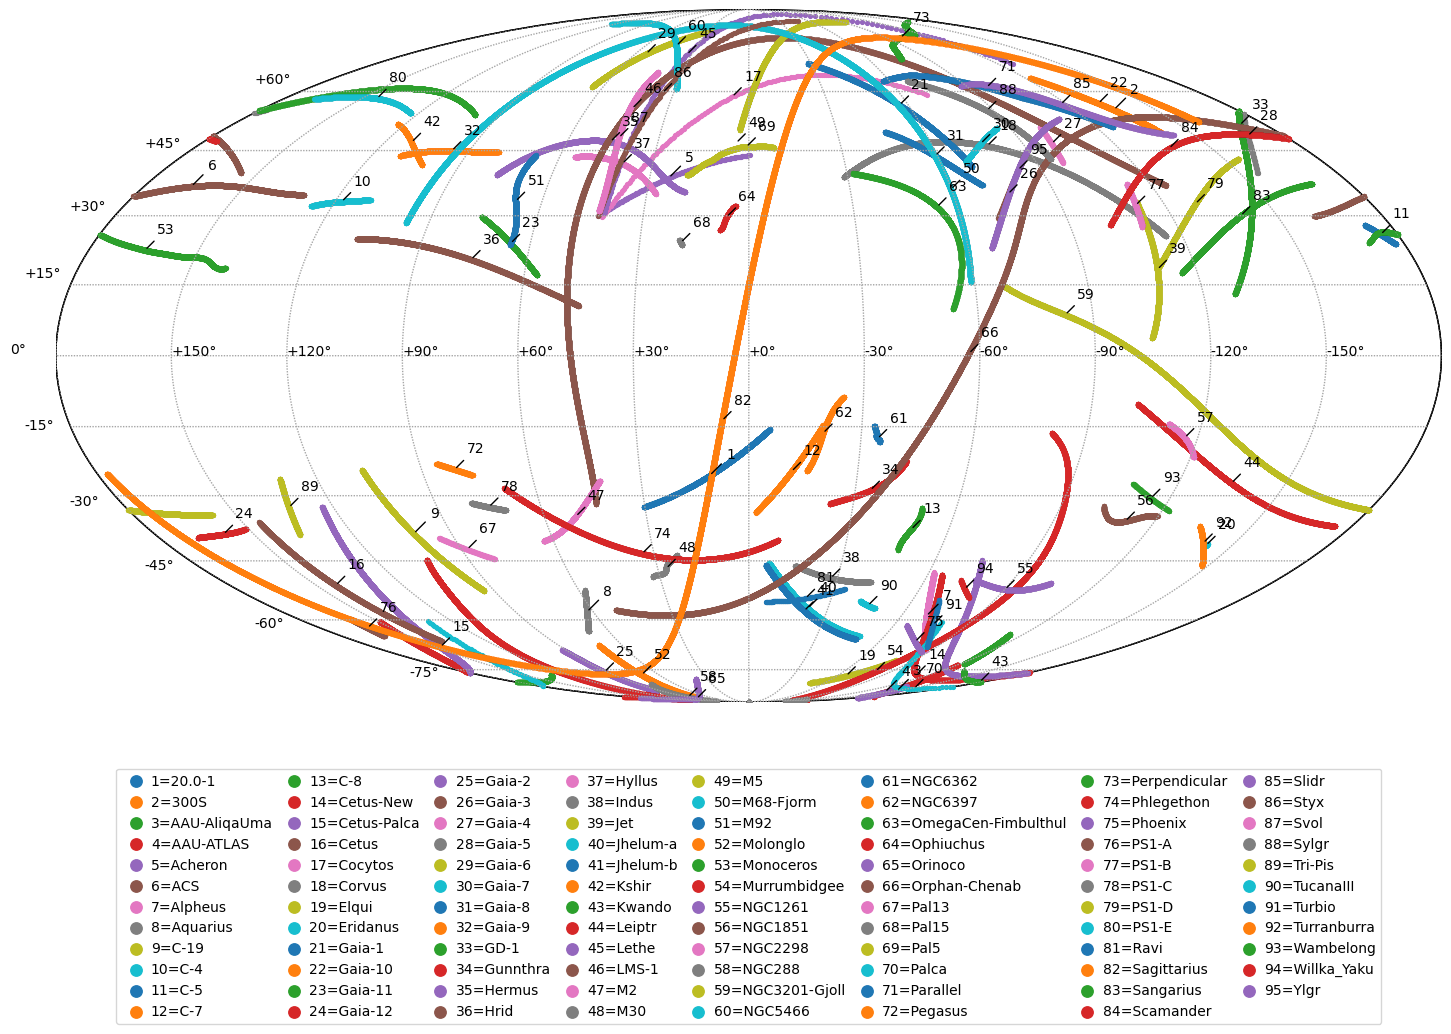

In [13]:
fig = plt.figure(1,figsize=(16.5,11))
ax = fig.add_subplot(111)

m = Basemap(projection='moll',lon_0=0., resolution='l')

#Meridian labels 
meridian_l = np.arange(-150,180,30)
meridian_b = np.zeros_like(meridian_l)
xms, yms = m(meridian_l, meridian_b)
for ii in np.arange(xms.size):
    ax.text(xms[ii], yms[ii], f'{meridian_l[ii]:+.0f}{chr(176)}')

grid_color=(0.65,0.65,0.65)
plabels_dic={'labels':[0,1,0,0],'labelstyle':'+/-', 'xoffset':0.04*(np.max(xms)-np.min(xms))}
m.drawmeridians(np.arange(0,360,30.),color=grid_color,linewidth=1., latmax=90.)
m.drawparallels(np.arange(-75,75,15.),color=grid_color,linewidth=1., **plabels_dic)
m.drawmapboundary()


for st in list(mws.keys())[:]:
 if mws.summary.loc[st,"On"]:
  #for a plot in equatorial coordinates, change galactic.l to icrs.ra and galactic.b to icrs.dec  
  x,y=m(mws[st].track.galactic.l.deg, mws[st].track.galactic.b.deg)
  ax.scatter(x,y, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mws[st].ID,Name=mws.summary.Name[st]))
  label = "{id:.0F}".format(id=mws[st].ID)
  #Using mid_point to place labels
  xy_stream = m(mws[st].mid_point.galactic.l.deg, mws[st].mid_point.galactic.b.deg)  
  ax.annotate(label, xy=xy_stream,  xycoords='data',
            xytext=(15,15), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-",color='k'),
            horizontalalignment='center', verticalalignment='center')
ax.grid(ls=':')
ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')


ax.invert_xaxis()

fig.subplots_adjust(left=0.01,right=0.99, top=0.98, bottom=0.35)

Mollweide - Equatorial
--------

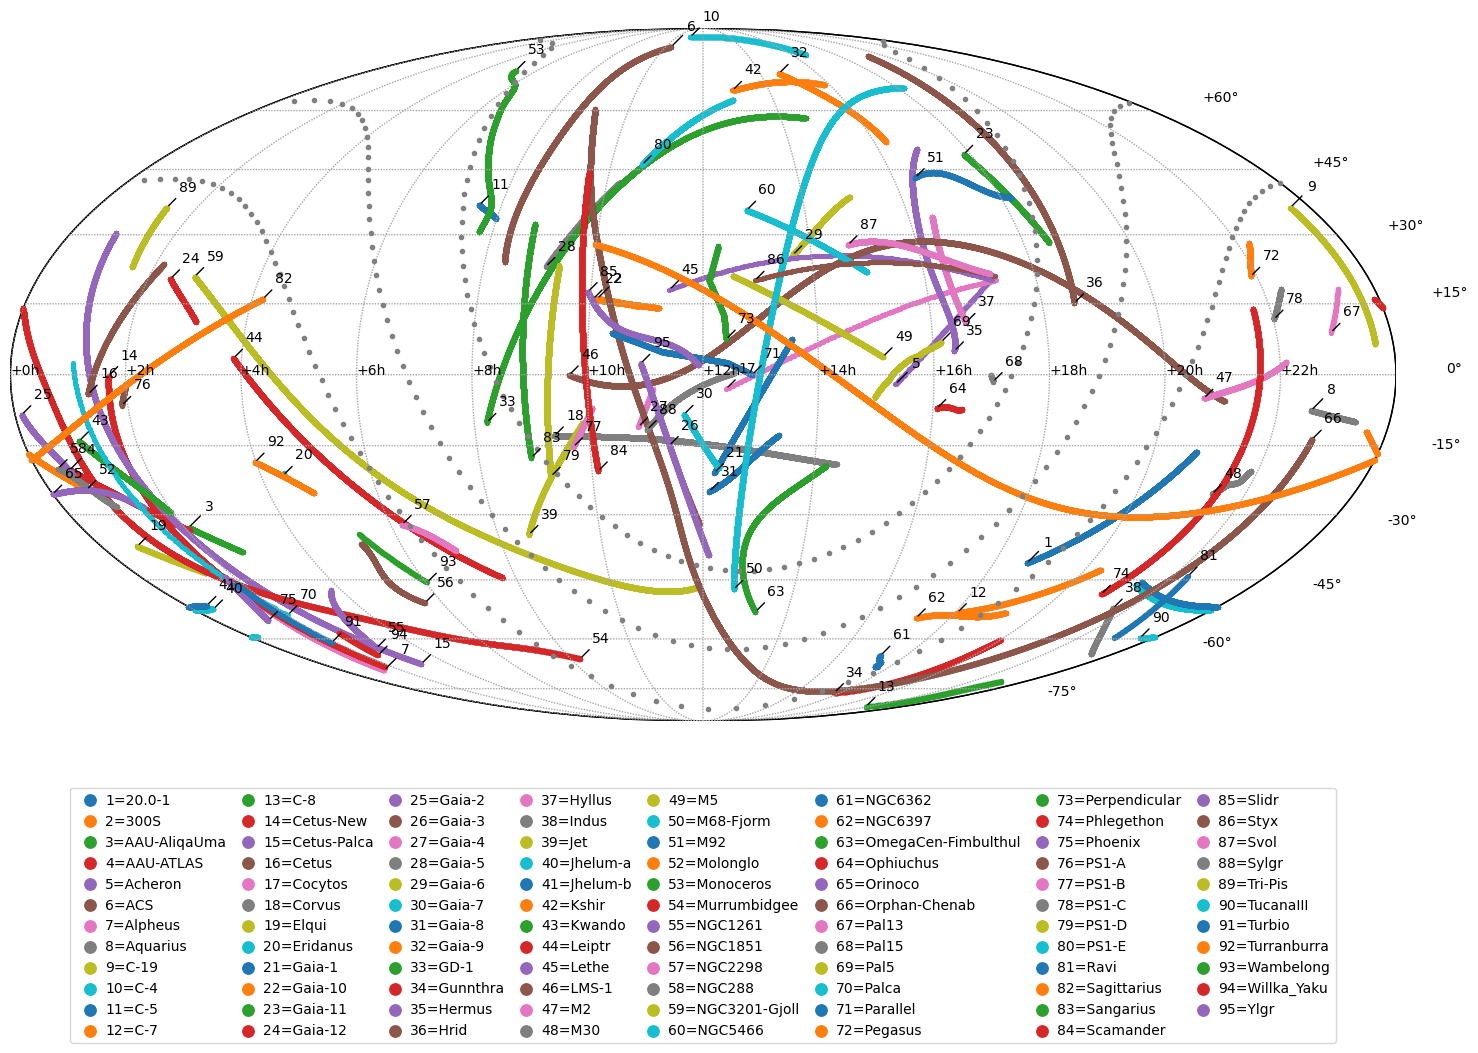

In [15]:
fig = plt.figure(1,figsize=(16.5,11))
ax = fig.add_subplot(111)

m = Basemap(projection='moll',lon_0=180., resolution='l')

#Meridian labels 
meridian_l = np.arange(0,360,30)
meridian_b = np.zeros_like(meridian_l)
xms, yms = m(meridian_l, meridian_b)
for ii in np.arange(xms.size):
    ax.text(xms[ii], yms[ii], f'{meridian_l[ii]/15.:+.0f}h')

grid_color=(0.65,0.65,0.65)
plabels_dic={'labels':[0,1,0,0],'labelstyle':'+/-', 'xoffset':0.04*(np.max(xms)-np.min(xms))}
m.drawmeridians(np.arange(0,360,30.),color=grid_color,linewidth=1., latmax=90.)
m.drawparallels(circles=np.arange(-75,75,15.),color=grid_color,linewidth=1., **plabels_dic)
m.drawmapboundary()


for st in list(mws.keys())[:]:
 if mws.summary.loc[st,"On"]:
  x,y=m(mws[st].track.icrs.ra.deg, mws[st].track.icrs.dec.deg)
  ax.scatter(x,y, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mws[st].ID,Name=mws.summary.Name[st]))
  label = "{id:.0F}".format(id=mws[st].ID)
  #Using end_point to place labels
  xy_stream = m(mws[st].end_points.icrs.ra[0].deg, mws[st].end_points.icrs.dec[0].deg)  
  ax.annotate(label, xy=xy_stream,  xycoords='data',
            xytext=(15,15), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-",color='k'),
            horizontalalignment='center', verticalalignment='center')
ax.grid(ls=':')
ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')

#Plot Galactic Plane
ls = np.linspace(0,360,100)
for bs in [0.,-20,+20]:
    gcp = ac.SkyCoord(l=ls, b=ls*0.+bs, unit=u.deg, frame='galactic')
    x,y = m(gcp.icrs.ra.deg, gcp.icrs.dec.deg)
    ax.plot(x,y,'.',ls='',color='gray')


ax.invert_xaxis()

fig.subplots_adjust(left=0.01,right=0.99, top=0.98, bottom=0.35)

North/South polar azimuthal projections
-----

Text(0.0, 1.0, 'Stream Tracks in the\nSouthern Galactic\nHemisphere')

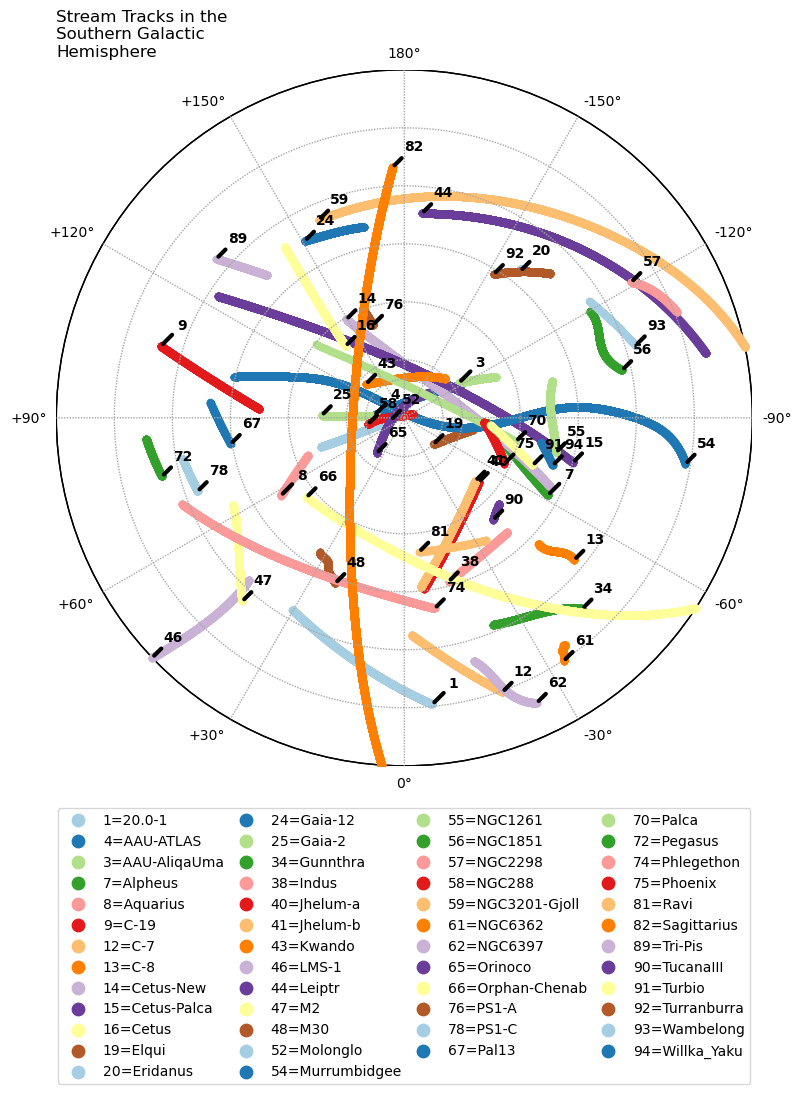

In [47]:
sns.set_palette('Paired')

#hem = 'N' #select the hemisphere to plot
hem = 'S' 

fig=plt.figure(1,figsize=(9,12))
ax=fig.add_subplot(111)
grid_color=(0.65,0.65,0.65)
mlabels_dic={'labels':[0,0,0,0],'labelstyle':'+/-'}
mlabels_dic['labels'][0]=1
mlabels_dic['labels'][1]=1
plabels_dic={'labels':[0,0,0,1],'labelstyle':'+/-'}

m = Basemap(projection=f'{hem.lower()}paeqd',lon_0=0.,ax=ax, boundinglat=0., round=True)

m.drawmeridians(np.arange(0,360,30.),color=grid_color,linewidth=1., latmax=90., **mlabels_dic)
if 'N' in hem: m.drawparallels(np.arange(0,75,15.),color=grid_color,linewidth=1., **plabels_dic)
if 'S' in hem: m.drawparallels(np.arange(-75,0.,15.),color=grid_color,linewidth=1., **plabels_dic)  
    
m.drawmapboundary()

#for st in list(mws.keys())[:]:
for st in np.sort(list(mws.keys())):    
   if mws.summary.loc[st,"On"]:  
    if 'N' in hem: mb = mws[st].track.galactic.b.deg>=0
    elif 'S' in hem: mb = mws[st].track.galactic.b.deg<=0    
    if mb.sum()<1: continue
    x,y=m(mws[st].track.galactic.l.deg[mb], mws[st].track.galactic.b.deg[mb])
    ax.scatter(x,y, s=20, label="{ID:.0f}={Name}".format(ID=mws.summary.ID[st],Name=mws.summary.Name[st]))
    
    label = "{id:.0F}".format(id=mws.summary.ID[st])
    xy_stream = (x[0],y[0])
    ax.annotate(label, xy=xy_stream,  xycoords='data',  weight="bold",
            xytext=(15,15), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-", lw=3, color='k'),
            horizontalalignment='center', verticalalignment='center')

    
fig.subplots_adjust(left=0.01,right=0.99, top=0.92, bottom=0.34)    
ax.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5,-0.05), markerscale=2., columnspacing=0.5)

if 'N' in hem:   hem_name, hem_short = 'Northern', 'ngp'
elif 'S' in hem: hem_name, hem_short = 'Southern', 'sgp'
ax.set_title(f"Stream Tracks in the\n{hem_name} Galactic\nHemisphere",pad=10,loc='left')